<a href="https://colab.research.google.com/github/Zienbastian33/AluraStore_Desafio/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importaci√≥n de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [2]:
# Calculamos el ingreso total de cada tienda sumando los valores de la columna 'Precio'
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# Creamos un diccionario con los nombres de las tiendas y sus ingresos
ingresos = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
}

# Convertimos el diccionario a un DataFrame para visualizarlo mejor
df_ingresos = pd.DataFrame(ingresos)

# Formateamos los valores para que sean m√°s legibles
df_ingresos['Ingreso Total'] = df_ingresos['Ingreso Total'].map('{:,.0f}'.format)

# Mostramos la tabla con los ingresos totales
print("Ingresos totales por tienda:")
df_ingresos

Ingresos totales por tienda:


Tienda  Ingreso Total
0  Tienda 1  1,150,880,400
1  Tienda 2  1,116,343,500
2  Tienda 3  1,098,019,600
3  Tienda 4  1,038,375,700

# 2. Ventas por categor√≠a

In [3]:
# Contamos productos por categor√≠a para cada tienda
categorias_tienda1 = tienda['Categor√≠a del Producto'].value_counts().reset_index()
categorias_tienda2 = tienda2['Categor√≠a del Producto'].value_counts().reset_index()
categorias_tienda3 = tienda3['Categor√≠a del Producto'].value_counts().reset_index()
categorias_tienda4 = tienda4['Categor√≠a del Producto'].value_counts().reset_index()

# Renombramos las columnas para mayor claridad
categorias_tienda1.columns = ['Categor√≠a', 'Cantidad Tienda 1']
categorias_tienda2.columns = ['Categor√≠a', 'Cantidad Tienda 2']
categorias_tienda3.columns = ['Categor√≠a', 'Cantidad Tienda 3']
categorias_tienda4.columns = ['Categor√≠a', 'Cantidad Tienda 4']

# Combinamos los resultados en un √∫nico DataFrame usando la categor√≠a como clave
# Primero combinamos tienda 1 y 2
categorias_combinadas = pd.merge(categorias_tienda1, categorias_tienda2, on='Categor√≠a', how='outer')

# Luego a√±adimos tienda 3 y 4
categorias_combinadas = pd.merge(categorias_combinadas, categorias_tienda3, on='Categor√≠a', how='outer')
categorias_combinadas = pd.merge(categorias_combinadas, categorias_tienda4, on='Categor√≠a', how='outer')

# Reemplazamos los valores NaN por 0 (para categor√≠as que no existen en alguna tienda)
categorias_combinadas = categorias_combinadas.fillna(0)

# Convertimos los valores a enteros
columnas_cantidad = ['Cantidad Tienda 1', 'Cantidad Tienda 2', 'Cantidad Tienda 3', 'Cantidad Tienda 4']
categorias_combinadas[columnas_cantidad] = categorias_combinadas[columnas_cantidad].astype(int)

# Ordenamos por la suma total de productos vendidos (todas las tiendas)
categorias_combinadas['Total'] = categorias_combinadas[columnas_cantidad].sum(axis=1)
categorias_combinadas = categorias_combinadas.sort_values(by='Total', ascending=False)

# Mostramos el resultado
print("Cantidad de productos vendidos por categor√≠a en cada tienda:")
categorias_combinadas

Cantidad de productos vendidos por categor√≠a en cada tienda:


Categor√≠a  Cantidad Tienda 1  Cantidad Tienda 2  \
7                  Muebles                465                442   
3             Electr√≥nicos                448                422   
5                 Juguetes                324                313   
2        Electrodom√©sticos                312                305   
1     Deportes y diversi√≥n                284                275   
4   Instrumentos musicales                182                224   
6                   Libros                173                197   
0  Art√≠culos para el hogar                171                181   

   Cantidad Tienda 3  Cantidad Tienda 4  Total  
7                499                480   1886  
3                451                451   1772  
5                315                338   1290  
2                278                254   1149  
1                277                277   1113  
4                177                170    753  
6                185                187    742  
0                177                201    730

# 3. Calificaci√≥n promedio de la tienda


In [ ]:
# Calculamos la calificaci√≥n promedio de cada tienda
calificacion_tienda1 = tienda['Calificaci√≥n'].mean()
calificacion_tienda2 = tienda2['Calificaci√≥n'].mean()
calificacion_tienda3 = tienda3['Calificaci√≥n'].mean()
calificacion_tienda4 = tienda4['Calificaci√≥n'].mean()

# Creamos un diccionario con los nombres de las tiendas y sus calificaciones promedio
calificaciones = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificaci√≥n Promedio': [calificacion_tienda1, calificacion_tienda2, calificacion_tienda3, calificacion_tienda4]
}

# Convertimos el diccionario a un dataFrame
df_calificaciones = pd.DataFrame(calificaciones)

# Redondeamos las calificaciones a 2 decimales para mejor visualizaci√≥n
df_calificaciones['Calificaci√≥n Promedio'] = df_calificaciones['Calificaci√≥n Promedio'].round(2)

# Mostramos la tabla con las calificaciones promedio
print("Calificaci√≥n promedio por tienda:")
df_calificaciones

Calificaci√≥n promedio por tienda:


Tienda  Calificaci√≥n Promedio
0  Tienda 1                   3.98
1  Tienda 2                   4.04
2  Tienda 3                   4.05
3  Tienda 4                   4.00

# 4. Productos m√°s y menos vendidos

In [4]:

# 1. Agrupamos los DataFrames en una lista para poder iterar sobre ellos.
lista_tiendas = [tienda, tienda2, tienda3, tienda4]

# 2. Usamos un ciclo para procesar cada tienda
for i, df_tienda in enumerate(lista_tiendas):

    # El 'i+1' es para que el n√∫mero de tienda sea 1, 2, 3, 4 en lugar de 0, 1, 2, 3
    numero_tienda = i + 1

    # Identificamos los productos para cada tienda en el ciclo
    conteo_productos = df_tienda['Producto'].value_counts().reset_index()
    conteo_productos.columns = ['Producto', 'Cantidad']

    top_5 = conteo_productos.head(5)
    bottom_5 = conteo_productos.tail(5)

    # 3. Mostramos los resultados para la tienda actual usando f-strings
    print(f"--- Resultados para la Tienda {numero_tienda} ---")

    print(f"\nTop 5 productos m√°s vendidos:")
    print(top_5) # Python muestra muy bien los DataFrames al imprimirlos

    print(f"\n5 productos menos vendidos:")
    print(bottom_5)

    print("\n" + "="*40 + "\n") # Un separador para que se vea m√°s ordenado

--- Resultados para la Tienda 1 ---

Top 5 productos m√°s vendidos:
           Producto  Cantidad
0        Microondas        60
1     TV LED UHD 4K        60
2           Armario        60
3  Secadora de ropa        58
4     Mesa de noche        56

5 productos menos vendidos:
                       Producto  Cantidad
46  Ciencia de datos con Python        39
47                    Pandereta        36
48              Olla de presi√≥n        35
49    Auriculares con micr√≥fono        33
50                 Celular ABXY        33


--- Resultados para la Tienda 2 ---

Top 5 productos m√°s vendidos:
                    Producto  Cantidad
0  Iniciando en programaci√≥n        65
1                 Microondas        62
2                    Bater√≠a        61
3          Guitarra ac√∫stica        58
4                  Pandereta        58

5 productos menos vendidos:
           Producto  Cantidad
46      Auriculares        37
47           Sill√≥n        35
48  Mesa de comedor        34
49        Im

# 5. Env√≠o promedio por tienda

In [5]:
# Calculamos el costo de env√≠o promedio para cada tienda
envio_tienda1 = tienda['Costo de env√≠o'].mean()
envio_tienda2 = tienda2['Costo de env√≠o'].mean()
envio_tienda3 = tienda3['Costo de env√≠o'].mean()
envio_tienda4 = tienda4['Costo de env√≠o'].mean()

# Creamos un diccionario con los nombres de las tiendas y sus costos de env√≠o promedio
envios = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo de Env√≠o Promedio': [envio_tienda1, envio_tienda2, envio_tienda3, envio_tienda4]
}

# Convertimos el diccionario a un DataFrame
df_envios = pd.DataFrame(envios)

# Formateamos los valores para que sean m√°s legibles
df_envios['Costo de Env√≠o Promedio'] = df_envios['Costo de Env√≠o Promedio'].round(2)

# Calculamos tambi√©n el porcentaje que representa el costo de env√≠o respecto al precio promedio
precio_promedio_t1 = tienda['Precio'].mean()
precio_promedio_t2 = tienda2['Precio'].mean()
precio_promedio_t3 = tienda3['Precio'].mean()
precio_promedio_t4 = tienda4['Precio'].mean()

# A√±adimos columnas con el precio promedio y el porcentaje
df_envios['Precio Promedio'] = [precio_promedio_t1, precio_promedio_t2, precio_promedio_t3, precio_promedio_t4]
df_envios['Precio Promedio'] = df_envios['Precio Promedio'].round(2)

df_envios['% Env√≠o del Precio'] = (df_envios['Costo de Env√≠o Promedio'] / df_envios['Precio Promedio'] * 100).round(2)

# Mostramos la tabla con los costos de env√≠o promedio
print("Costo de env√≠o promedio por tienda:")
df_envios

Costo de env√≠o promedio por tienda:


Tienda  Costo de Env√≠o Promedio  Precio Promedio  % Env√≠o del Precio
0  Tienda 1                 26018.61        487867.91                5.33
1  Tienda 2                 25216.24        473227.43                5.33
2  Tienda 3                 24805.68        465459.77                5.33
3  Tienda 4                 23459.46        440362.89                5.33

# Grafico 1

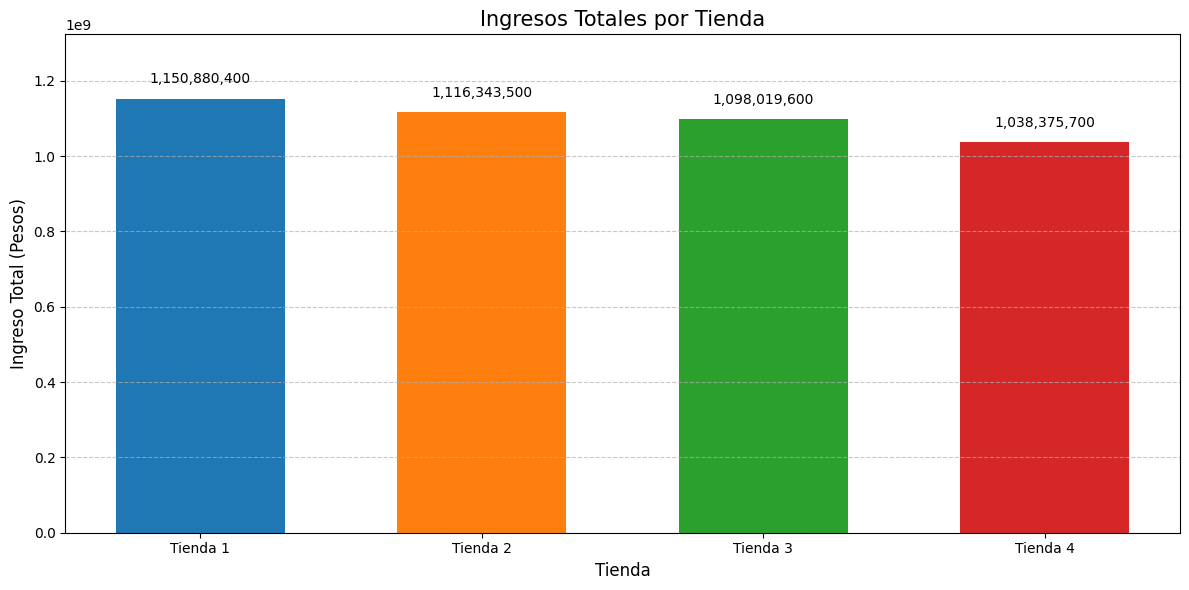

In [6]:
# Importamos las bibliotecas necesarias
import matplotlib.pyplot as plt

# Calculamos el ingreso total de cada tienda (este paso puede omitirse si ya tienes los valores calculados)
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# Creamos un diccionario con los nombres de las tiendas y sus ingresos
ingresos = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
}

# Definimos colores para cada tienda
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # azul, naranja, verde, rojo

# Configuramos el tama√±o de la figura
plt.figure(figsize=(12, 6))

# Creamos el gr√°fico de barras
barras = plt.bar(
    ingresos['Tienda'],
    ingresos['Ingreso Total'],
    color=colores,
    width=0.6
)

# Ajustamos los l√≠mites del eje Y para que haya espacio para los textos
plt.ylim(0, max(ingresos['Ingreso Total']) * 1.15)  # 15% m√°s alto que el valor m√°ximo

# A√±adimos el valor num√©rico encima de cada barra (ahora un poco m√°s cerca)
for i, barra in enumerate(barras):
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura * 1.03,  # Solo 3% arriba de la barra
        f'{ingresos["Ingreso Total"][i]:,.0f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# A√±adimos t√≠tulos y etiquetas
plt.title('Ingresos Totales por Tienda', fontsize=15)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingreso Total (Pesos)', fontsize=12)  # Cambiado de COP a Pesos

# Mejoramos la apariencia del gr√°fico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostramos el gr√°fico
plt.show()

# Grafico 2

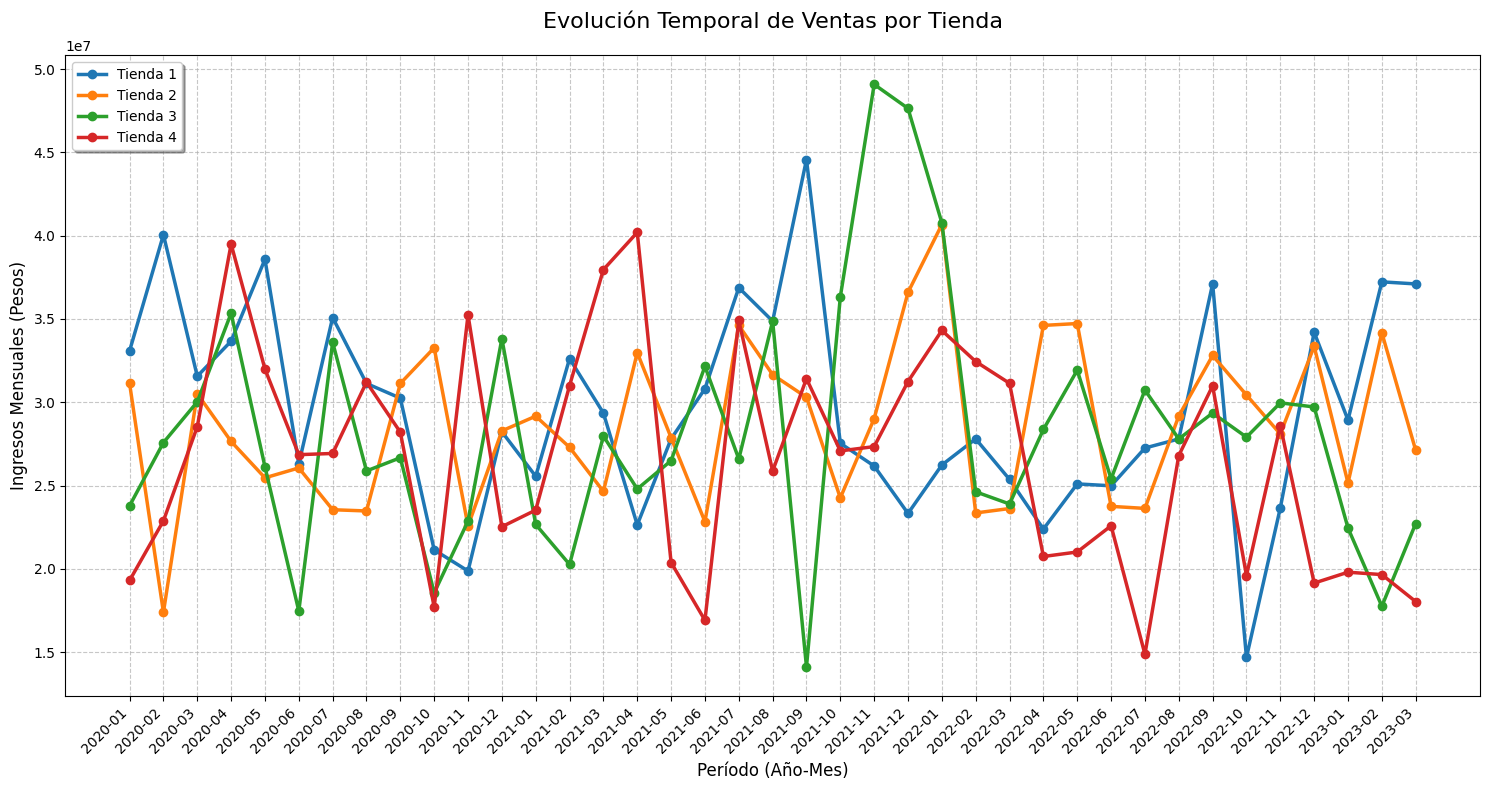

An√°lisis de Tendencias por Tienda:

Tienda 1:
  ‚Ä¢ Tendencia general: +12.1%
  ‚Ä¢ Promedio mensual: 29,509,754 pesos
  ‚Ä¢ Variabilidad: 21.0% (coef. de variaci√≥n)
  ‚Ä¢ Estado: üìà CRECIMIENTO

Tienda 2:
  ‚Ä¢ Tendencia general: -12.9%
  ‚Ä¢ Promedio mensual: 28,624,192 pesos
  ‚Ä¢ Variabilidad: 16.8% (coef. de variaci√≥n)
  ‚Ä¢ Estado: üìâ DECLIVE

Tienda 3:
  ‚Ä¢ Tendencia general: -4.5%
  ‚Ä¢ Promedio mensual: 28,154,349 pesos
  ‚Ä¢ Variabilidad: 26.0% (coef. de variaci√≥n)
  ‚Ä¢ Estado: ‚û°Ô∏è ESTABLE

Tienda 4:
  ‚Ä¢ Tendencia general: -6.6%
  ‚Ä¢ Promedio mensual: 26,625,018 pesos
  ‚Ä¢ Variabilidad: 25.0% (coef. de variaci√≥n)
  ‚Ä¢ Estado: üìâ DECLIVE


In [8]:
# Preparamos los datos temporales para cada tienda
def preparar_datos_temporales(df_tienda, nombre_tienda):
    # Convertimos la fecha a datetime
    df_temp = df_tienda.copy()
    df_temp['Fecha de Compra'] = pd.to_datetime(df_temp['Fecha de Compra'], format='%d/%m/%Y')

    # Extraemos a√±o y mes
    df_temp['A√±o_Mes'] = df_temp['Fecha de Compra'].dt.to_period('M')

    # Agrupamos por mes y sumamos los ingresos
    ventas_mensuales = df_temp.groupby('A√±o_Mes')['Precio'].sum().reset_index()
    ventas_mensuales['Tienda'] = nombre_tienda

    return ventas_mensuales

# Preparamos los datos para las 4 tiendas
ventas_t1 = preparar_datos_temporales(tienda, 'Tienda 1')
ventas_t2 = preparar_datos_temporales(tienda2, 'Tienda 2')
ventas_t3 = preparar_datos_temporales(tienda3, 'Tienda 3')
ventas_t4 = preparar_datos_temporales(tienda4, 'Tienda 4')

# Combinamos todos los datos
ventas_todas = pd.concat([ventas_t1, ventas_t2, ventas_t3, ventas_t4], ignore_index=True)

# Convertimos el per√≠odo a string para mejor manejo
ventas_todas['A√±o_Mes_str'] = ventas_todas['A√±o_Mes'].astype(str)

# Creamos el gr√°fico
plt.figure(figsize=(15, 8))

# Definimos colores consistentes con los gr√°ficos anteriores
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Graficamos cada tienda
for i, tienda_nombre in enumerate(tiendas):
    datos_tienda = ventas_todas[ventas_todas['Tienda'] == tienda_nombre]

    # Ordenamos por fecha
    datos_tienda = datos_tienda.sort_values('A√±o_Mes')

    plt.plot(
        datos_tienda['A√±o_Mes_str'],
        datos_tienda['Precio'],
        marker='o',
        linewidth=2.5,
        markersize=6,
        color=colores[i],
        label=tienda_nombre
    )

# Configuramos la apariencia del gr√°fico
plt.title('Evoluci√≥n Temporal de Ventas por Tienda', fontsize=16, pad=20)
plt.xlabel('Per√≠odo (A√±o-Mes)', fontsize=12)
plt.ylabel('Ingresos Mensuales (Pesos)', fontsize=12)

# Rotamos las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# A√±adimos grilla para mejor lectura
plt.grid(True, linestyle='--', alpha=0.7)

# Configuramos la leyenda
plt.legend(loc='upper left', frameon=True, fancybox=True, shadow=True)

# Ajustamos el layout
plt.tight_layout()

# Mostramos el gr√°fico
plt.show()

# Calculamos algunas estad√≠sticas adicionales para el an√°lisis
print("An√°lisis de Tendencias por Tienda:")
print("=" * 50)

for tienda_nombre in tiendas:
    datos_tienda = ventas_todas[ventas_todas['Tienda'] == tienda_nombre].sort_values('A√±o_Mes')

    if len(datos_tienda) > 1:
        # Calculamos la tendencia (diferencia entre √∫ltimo y primer mes)
        primer_mes = datos_tienda.iloc[0]['Precio']
        ultimo_mes = datos_tienda.iloc[-1]['Precio']
        tendencia = ((ultimo_mes - primer_mes) / primer_mes) * 100

        # Calculamos la variabilidad (desviaci√≥n est√°ndar)
        variabilidad = datos_tienda['Precio'].std()
        promedio_mensual = datos_tienda['Precio'].mean()
        coef_variacion = (variabilidad / promedio_mensual) * 100

        print(f"\n{tienda_nombre}:")
        print(f"  ‚Ä¢ Tendencia general: {tendencia:+.1f}%")
        print(f"  ‚Ä¢ Promedio mensual: {promedio_mensual:,.0f} pesos")
        print(f"  ‚Ä¢ Variabilidad: {coef_variacion:.1f}% (coef. de variaci√≥n)")

        if tendencia > 5:
            print(f"  ‚Ä¢ Estado: üìà CRECIMIENTO")
        elif tendencia < -5:
            print(f"  ‚Ä¢ Estado: üìâ DECLIVE")
        else:
            print(f"  ‚Ä¢ Estado: ‚û°Ô∏è ESTABLE")

Grafico 3

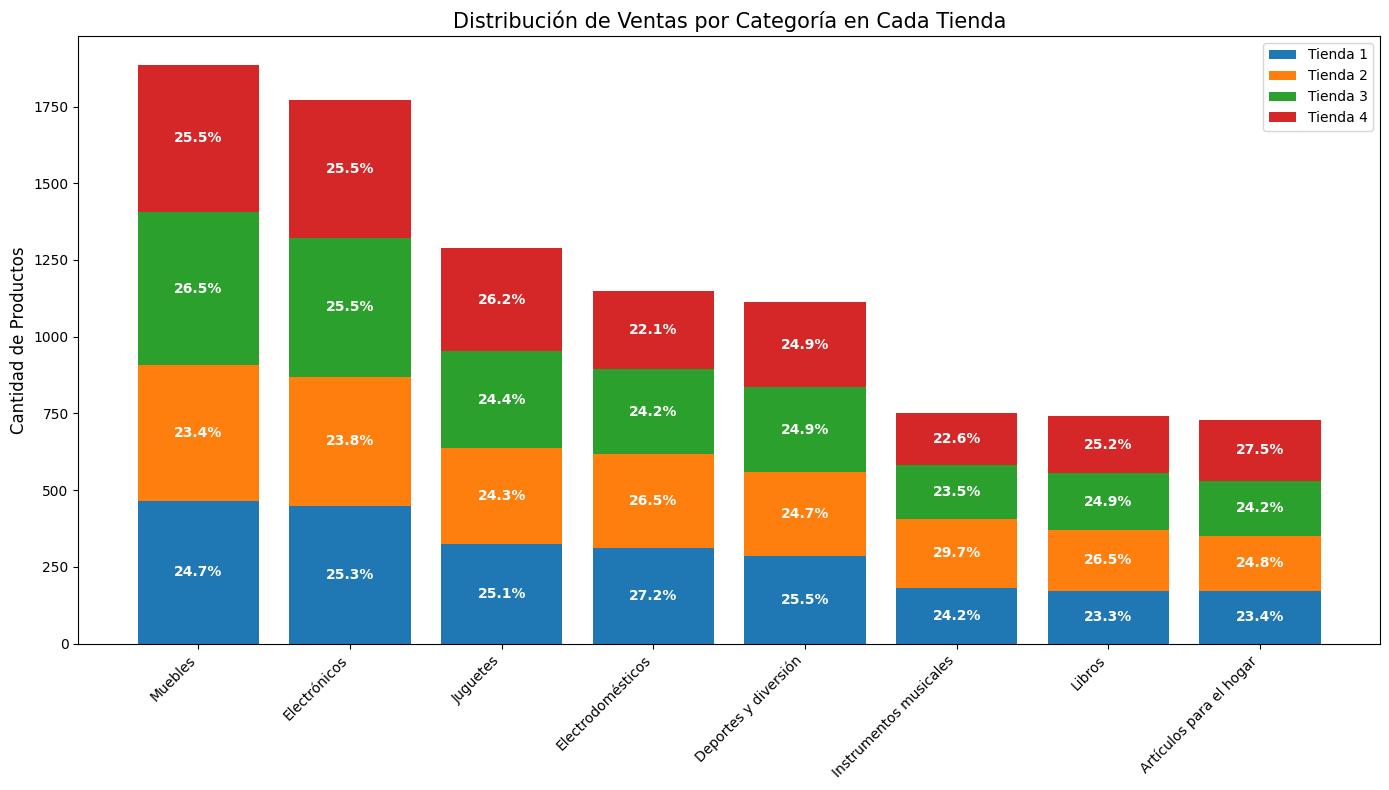

In [7]:
# Preparamos los datos para el gr√°fico de barras apiladas
categorias = categorias_combinadas['Categor√≠a'].tolist()
tienda1_valores = categorias_combinadas['Cantidad Tienda 1'].tolist()
tienda2_valores = categorias_combinadas['Cantidad Tienda 2'].tolist()
tienda3_valores = categorias_combinadas['Cantidad Tienda 3'].tolist()
tienda4_valores = categorias_combinadas['Cantidad Tienda 4'].tolist()

# Calculamos los totales por categor√≠a para los porcentajes
totales_categoria = categorias_combinadas['Total'].tolist()

# Creamos el gr√°fico
fig, ax = plt.subplots(figsize=(14, 8))

# Definimos la posici√≥n de las barras
indice = range(len(categorias))

# Creamos las barras apiladas
barra1 = ax.bar(indice, tienda1_valores, label='Tienda 1', color='#1f77b4')
barra2 = ax.bar(indice, tienda2_valores, bottom=tienda1_valores, label='Tienda 2', color='#ff7f0e')

# Calculamos las posiciones para las siguientes barras
bottom_temp = [i + j for i, j in zip(tienda1_valores, tienda2_valores)]
barra3 = ax.bar(indice, tienda3_valores, bottom=bottom_temp, label='Tienda 3', color='#2ca02c')

# Actualizamos las posiciones
bottom_temp = [i + j + k for i, j, k in zip(tienda1_valores, tienda2_valores, tienda3_valores)]
barra4 = ax.bar(indice, tienda4_valores, bottom=bottom_temp, label='Tienda 4', color='#d62728')

# A√±adimos porcentajes dentro de cada secci√≥n de las barras
def a√±adir_porcentajes(barras, valores, posicion_base, totales):
    for i, (barra, valor, total) in enumerate(zip(barras, valores, totales)):
        # Solo a√±adimos texto si el porcentaje es significativo (>3%)
        if valor/total > 0.03:  # Para evitar texto en barras muy peque√±as
            porcentaje = f'{valor/total*100:.1f}%'
            # Calculamos la posici√≥n central de la barra (vertical)
            y_pos = posicion_base[i] + valor/2
            ax.text(i, y_pos, porcentaje, ha='center', va='center',
                   color='white', fontweight='bold')

# Definimos las posiciones base para cada capa de la barra de forma expl√≠cita
posicion_base1 = [0] * len(categorias)
posicion_base2 = tienda1_valores
posicion_base3 = [i + j for i, j in zip(tienda1_valores, tienda2_valores)]
posicion_base4 = [i + j + k for i, j, k in zip(tienda1_valores, tienda2_valores, tienda3_valores)]

# A√±adimos los porcentajes para cada tienda usando las bases correctas
a√±adir_porcentajes(barra1, tienda1_valores, posicion_base1, totales_categoria)
a√±adir_porcentajes(barra2, tienda2_valores, posicion_base2, totales_categoria)
a√±adir_porcentajes(barra3, tienda3_valores, posicion_base3, totales_categoria) # <-- CORRECCI√ìN: Usamos la base correcta
a√±adir_porcentajes(barra4, tienda4_valores, posicion_base4, totales_categoria)

# Configuramos la apariencia del gr√°fico
ax.set_title('Distribuci√≥n de Ventas por Categor√≠a en Cada Tienda', fontsize=15)
ax.set_ylabel('Cantidad de Productos', fontsize=12)
ax.set_xticks(indice)
ax.set_xticklabels(categorias, rotation=45, ha='right')

# A√±adimos la leyenda
ax.legend(loc='upper right')

# Ajustamos el layout
plt.tight_layout()

# Mostramos el gr√°fico
plt.show()

# Informe Final:


# Informe Estrat√©gico de Portafolio: Recomendaci√≥n de Venta para AluraStore Latam



### An√°lisis de rendimiento y recomendaci√≥n para la venta de una tienda:



1. Introducci√≥n: Prop√≥sito del An√°lisis

El presente informe tiene como objetivo proporcionar una recomendaci√≥n clara y basada en datos sobre qu√© tienda del portafolio "AluraStore Latam" deber√≠a ser vendida. La decisi√≥n se fundamenta en un an√°lisis integral del rendimiento de las cuatro tiendas, considerando m√©tricas clave como ingresos, popularidad de categor√≠as, satisfacci√≥n del cliente, costos operativos y, fundamentalmente, la trayectoria de crecimiento de cada una. El objetivo es optimizar el portafolio, desinvirtiendo en el activo de menor rendimiento para concentrar recursos en las operaciones m√°s rentables y con mayor potencial.




--------------------------------------------------------------------

2. Desarrollo: Hallazgos Clave del An√°lisis Comparativo

Antes de llegar a una conclusi√≥n, es crucial destacar que no todos los factores analizados son diferenciadores. Ciertas fortalezas son comunes a todo el portafolio:


*Satisfacci√≥n del Cliente Homog√©nea*: Todas las tiendas gozan de una excelente reputaci√≥n, con calificaciones promedio casi id√©nticas y altas, que var√≠an m√≠nimamente entre 3.98 y 4.05. Esto indica que la calidad del producto y la experiencia del cliente son consistentes y no constituyen una debilidad en ninguna de las tiendas.


*Estructura de Costos de Env√≠o Estandarizada*: El costo de env√≠o representa un 5.33% del precio promedio del producto de manera uniforme en las cuatro tiendas. Esto sugiere una pol√≠tica de env√≠os centralizada y eficiente, que tampoco sirve como factor para diferenciar un activo de bajo rendimiento.


*Cartera de Productos Similar*: Las categor√≠as m√°s vendidas, como Muebles y Electr√≥nicos, son las mismas en todo el portafolio, lo que indica una estrategia de inventario unificada.

La decisi√≥n, por tanto, debe basarse en los indicadores que s√≠ muestran una divergencia significativa en el rendimiento: los ingresos totales y la tendencia de ventas a lo largo del tiempo.


El siguiente gr√°fico de barras resume los ingresos totales, estableciendo una primera jerarqu√≠a de rendimiento financiero.

Gr√°fico 1: Ingresos Totales por Tienda. Se observa que la Tienda 1 es la l√≠der indiscutible en ingresos, mientras que la Tienda 4 genera la menor facturaci√≥n total.
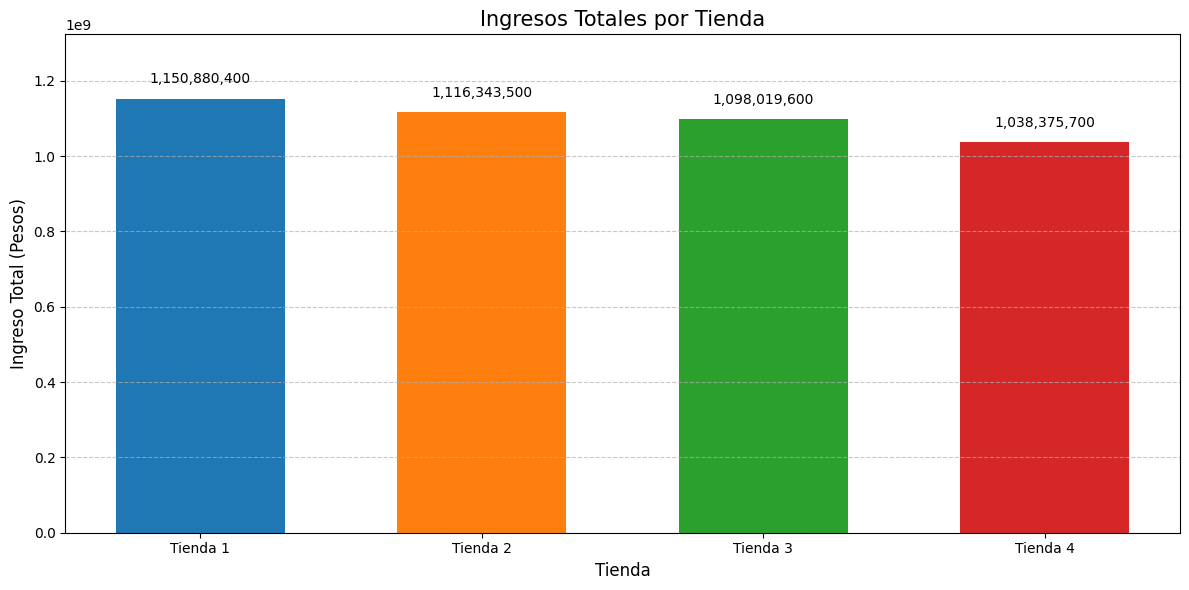

Sin embargo, el an√°lisis m√°s revelador es la evoluci√≥n de las ventas, que nos indica la salud y direcci√≥n futura de cada negocio.

Gr√°fico 2: Evoluci√≥n Temporal de Ventas. Este gr√°fico es cr√≠tico y muestra:

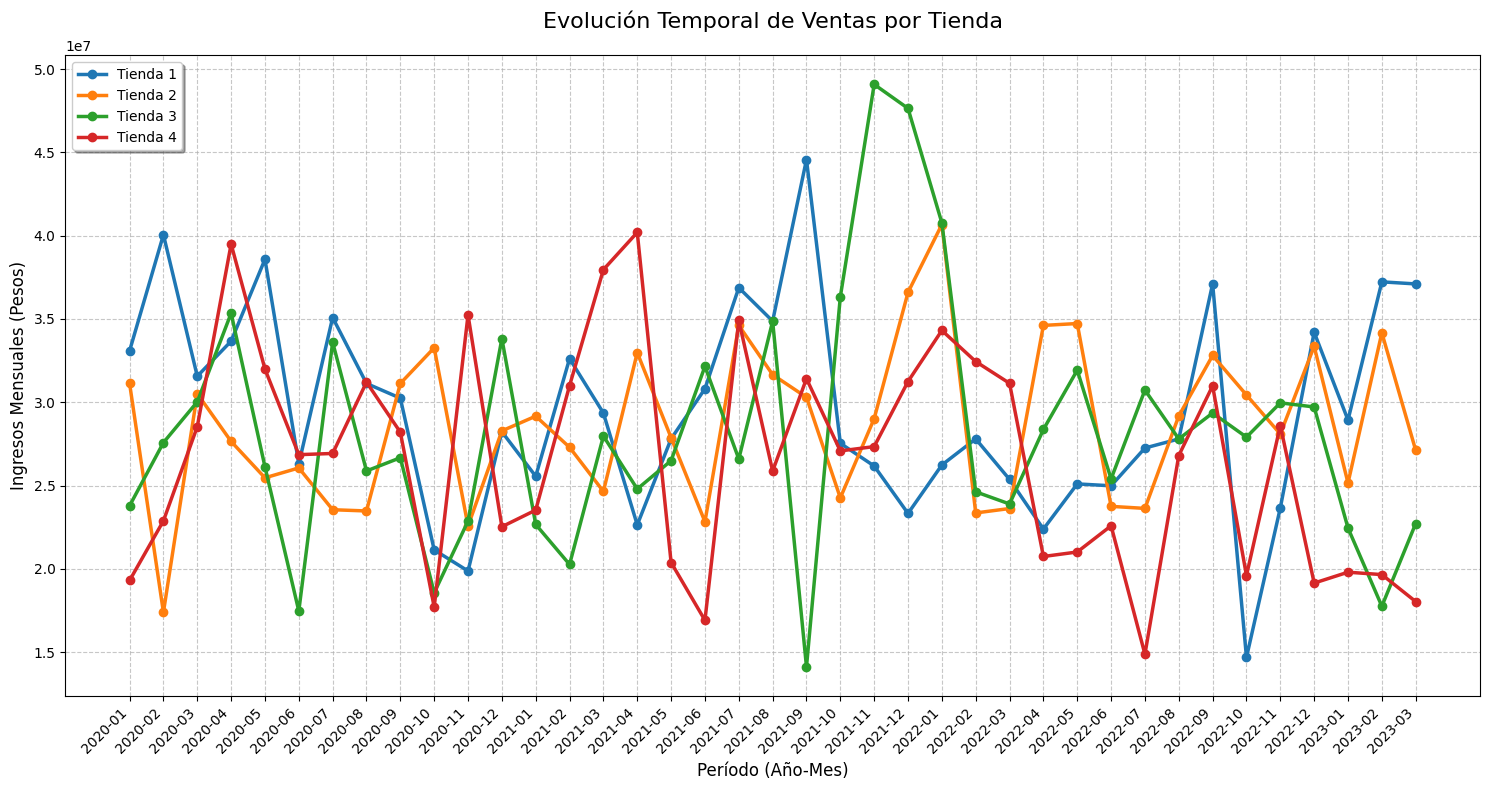


Como puede apreciar en el grafico anterior;

Tienda 1: La √∫nica tienda con una trayectoria de crecimiento claro y positivo (+12.1%).


Tienda 3: Se mantiene relativamente estable.


Tienda 2 y Tienda 4: Ambas est√°n en una clara tendencia de declive. La Tienda 2 muestra el declive m√°s pronunciado (-12.9%).

----------------------------------------------------------------------------



3. Conclusi√≥n y Recomendaci√≥n Final

La evidencia apunta de manera concluyente a que las Tiendas 2 y 4 son las de peor rendimiento. Si bien la Tienda 2 presenta la tasa de declive m√°s preocupante, la Tienda 4 combina dos factores negativos decisivos:

Es la que genera los menores ingresos totales de todo el portafolio.

Su tendencia de ventas est√° en declive (-6.6%), confirmando que su bajo rendimiento no es una anomal√≠a, sino una trayectoria sostenida.

*Recomendaci√≥n: Vender la Tienda 4*.

Justificaci√≥n: La Tienda 4 es el activo con el rendimiento hist√≥rico m√°s bajo y sin signos de recuperaci√≥n. Su venta representa la decisi√≥n m√°s l√≥gica para optimizar el portafolio. Liberar√° capital y enfoque de gesti√≥n que pueden ser reinvertidos en la Tienda 1 para acelerar su crecimiento, o utilizados para revitalizar la Tienda 3. Aunque la Tienda 2 tambi√©n es motivo de preocupaci√≥n por su r√°pido declive, la Tienda 4 es, sin lugar a dudas, el eslab√≥n m√°s d√©bil en t√©rminos de contribuci√≥n global al negocio.



Analista de Datos Jr.  Bastian Araya Ch.